In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#set seaborn styling
sns.set(style="whitegrid")
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

# create a single DataFrame
df = pd.concat([X, y], axis=1)  
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.isnull().sum()


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()


In [11]:
#Impute th emissing with a category
df['job'].fillna('unknown', inplace=True)
df['education'].fillna('unknown', inplace=True)
df['poutcome'].fillna('unknown', inplace=True)
df['contact'].fillna('none', inplace=True)



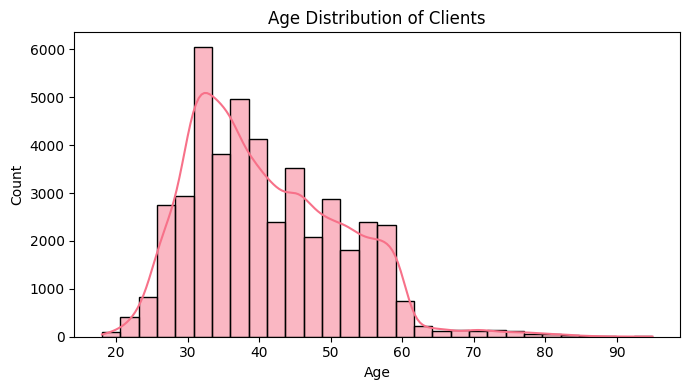

In [14]:
#age distribution
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


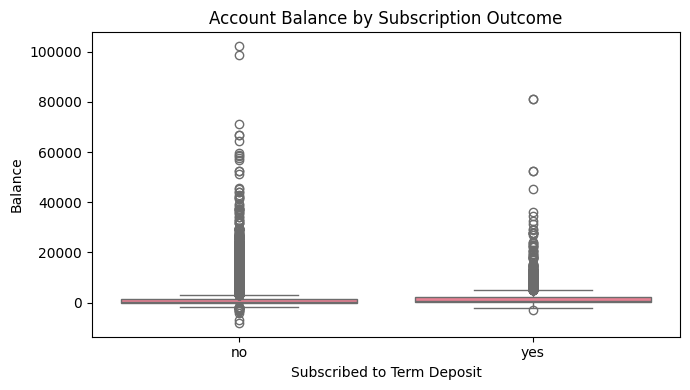

'the peope between the age of 20-40 are the majority of subscribers'

In [29]:
#balance vs subscription
plt.figure(figsize=(7,4))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Account Balance by Subscription Outcome')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()
'''the peope between the age of 20-40 are the majority of subscribers'''

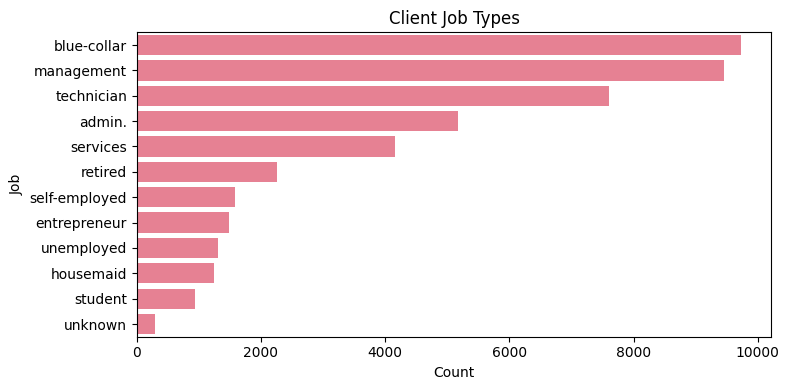

'blue colar jobs have the highest numbeer of customers while students asre the least'

In [31]:
#job count types
plt.figure(figsize=(8,4))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Client Job Types')
plt.xlabel('Count')
plt.ylabel('Job')
plt.tight_layout()
plt.show()
'''blue colar jobs have the highest numbeer of customers while students asre the least'''

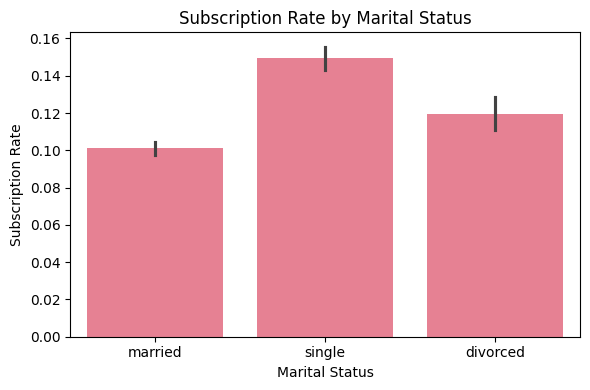

'single people are the majority of subscribers'

In [32]:
#subscription by marital status
plt.figure(figsize=(6,4))
sns.barplot(x='marital', y=df['y'].map({'yes':1, 'no':0}), data=df)
plt.title('Subscription Rate by Marital Status')
plt.ylabel('Subscription Rate')
plt.xlabel('Marital Status')
plt.tight_layout()
plt.show()
'''single people are the majority of subscribers'''

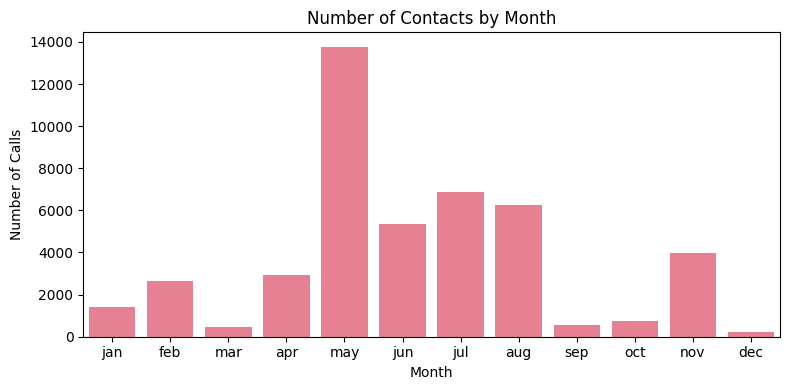

'the second quater experienced more contacts'

In [33]:
#monthly trends of contact
plt.figure(figsize=(8,4))
sns.countplot(x='month', data=df, order=[
    'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Number of Contacts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()
'''the second quater experienced more contacts'''

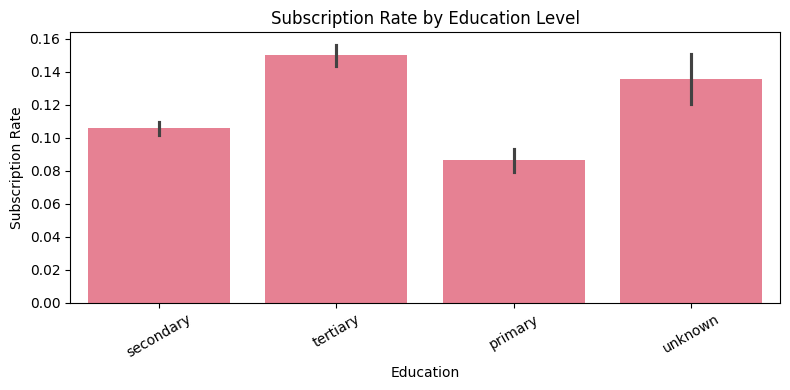

In [19]:
#sub rate by education
plt.figure(figsize=(8,4))
sns.barplot(x='education', y=df['y'].map({'yes':1,'no':0}), data=df,
            order=df['education'].value_counts().index)
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


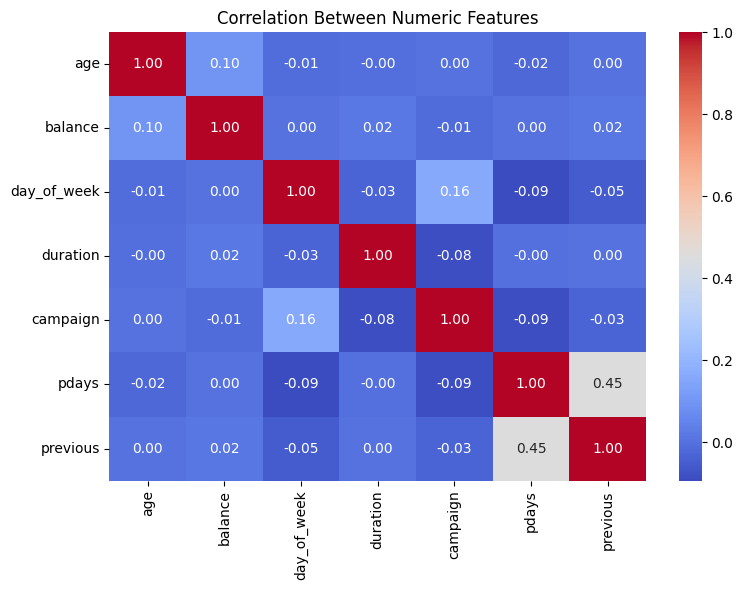

In [20]:
#heatmap numeric correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()


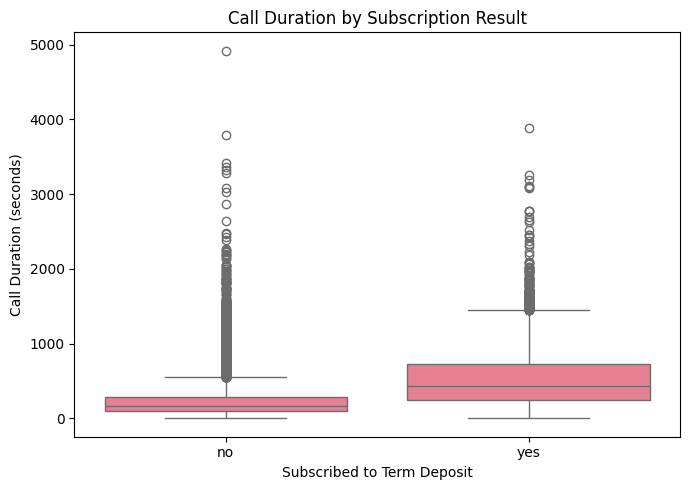

'\nClients who ended up subscribing were usually contacted fewer times on average.\nOver-calling seems to hurt conversion, a practical insight for the marketing team.'

In [26]:
#campaign duration vs outcome
plt.figure(figsize=(7,5))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration by Subscription Result')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Call Duration (seconds)')
plt.tight_layout()
plt.show()
'''
Clients who ended up subscribing were usually contacted fewer times on average.
Over-calling seems to hurt conversion, a practical insight for the marketing team.'''


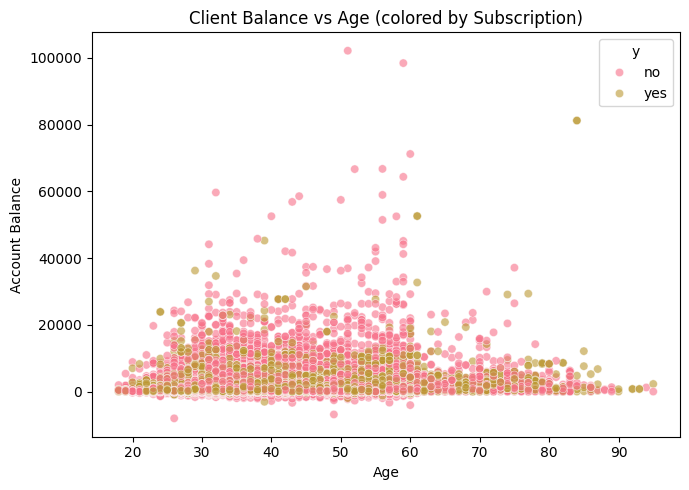

In [27]:
#age vs balance
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='balance', hue='y', data=df, alpha=0.6)
plt.title('Client Balance vs Age (colored by Subscription)')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()



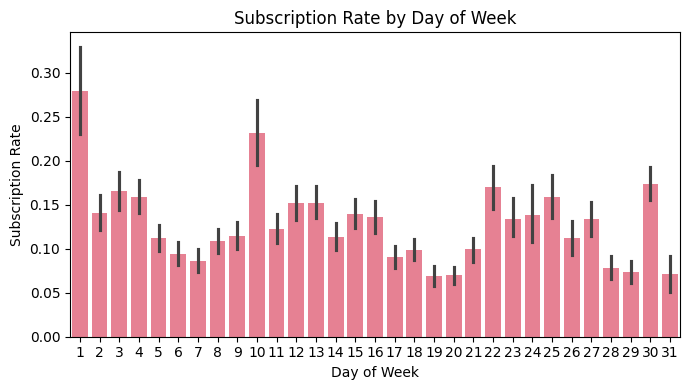

In [23]:
#day of the week effect
plt.figure(figsize=(7,4))
sns.barplot(x='day_of_week', y=df['y'].map({'yes':1,'no':0}), data=df)
plt.title('Subscription Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Subscription Rate')
plt.tight_layout()
plt.show()


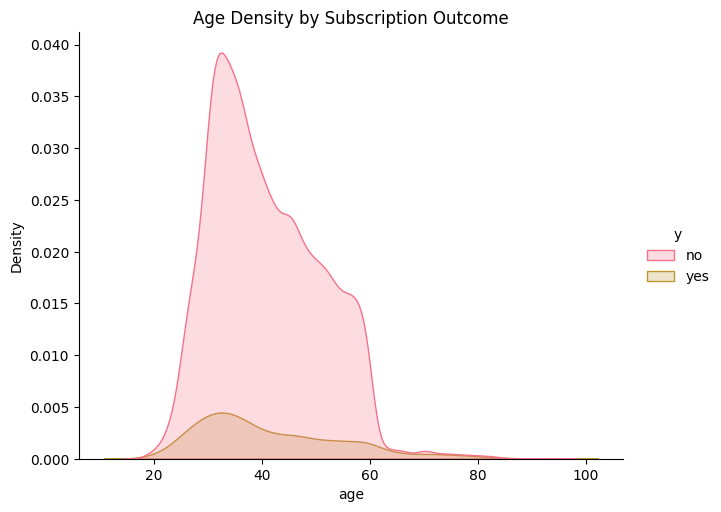

'the peope between the age of 20-40 are the majority of subscribers'

In [28]:
#age dist by outcome
sns.displot(df, x='age', hue='y', kind='kde', fill=True, height=5, aspect=1.3)
plt.title('Age Density by Subscription Outcome')
plt.show()
'''the peope between the age of 20-40 are the majority of subscribers'''

In [ ]:
"""
Married clients often have slightly higher average balances.

Subscription rates vary noticeably by education level—often higher among tertiary-educated clients.
